# Final Project Instructions
### Experiment Overview: Free Trial Screener
At the time of this experiment, Udacity courses currently have two options on the course overview page: "start free trial", and "access course materials". If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.


In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course. If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. [This screenshot](https://drive.google.com/file/d/0ByAfiG8HpNUMakVrS0s4cGN2TjQ/view?resourcekey=0-6_dPu8BRM1XlRgV51nIbtA) shows what the experiment looks like.


The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.


The unit of diversion is a cookie, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.

### Metric Choice
Which of the following metrics would you choose to measure for this experiment and why? For each metric you choose, indicate whether you would use it as an invariant metric or an evaluation metric. The practical significance boundary for each metric, that is, the difference that would have to be observed before that was a meaningful change for the business, is given in parentheses. All practical significance boundaries are given as absolute changes.


Any place "unique cookies" are mentioned, the uniqueness is determined by day. (That is, the same cookie visiting on different days would be counted twice.) User-ids are automatically unique since the site does not allow the same user-id to enroll twice.


- `Number of cookies`: That is, number of unique cookies to view the course overview page. (dmin=3000)
- `Number of user-ids`: That is, number of users who enroll in the free trial. (dmin=50)
- `Number of clicks`: That is, number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is trigger). (dmin=240)
- `Click-through-probability`: That is, number of unique cookies to click the "Start free trial" button divided by number of unique cookies to view the course overview page. (dmin=0.01)
- `Gross conversion`: That is, number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (dmin= 0.01)
- `Retention`: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)
- `Net conversion`: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button. (dmin= 0.0075)

You should also decide now what results you will be looking for in order to launch the experiment. Would a change in any one of your evaluation metrics be sufficient? Would you want to see multiple metrics all move or not move at the same time in order to launch? This decision will inform your choices while designing the experiment.


### Measuring Variability
[This spreadsheet](https://docs.google.com/spreadsheets/d/1MYNUtC47Pg8hdoCjOXaHqF-thheGpUshrFA21BAJnNc/edit#gid=0) contains rough estimates of the baseline values for these metrics (again, these numbers have been changed from Udacity's true numbers).


For each metric you selected as an evaluation metric, estimate its standard deviation analytically. Do you expect the analytic estimates to be accurate? That is, for which metrics, if any, would you want to collect an empirical estimate of the variability if you had time?


### Sizing
##### Choosing Number of Samples given Power
Using the analytic estimates of variance, how many pageviews total (across both groups) would you need to collect to adequately power the experiment? Use an alpha of 0.05 and a beta of 0.2. Make sure you have enough power for each metric.


##### Choosing Duration vs. Exposure
What percentage of Udacity's traffic would you divert to this experiment (assuming there were no other experiments you wanted to run simultaneously)? Is the change risky enough that you wouldn't want to run on all traffic?


Given the percentage you chose, how long would the experiment take to run, using the analytic estimates of variance? If the answer is longer than a few weeks, then this is unreasonably long, and you should reconsider an earlier decision.


### Analysis
The data for you to analyze is [here](https://docs.google.com/spreadsheets/d/1Mu5u9GrybDdska-ljPXyBjTpdZIUev_6i7t4LRDfXM8/edit#gid=0). This data contains the raw information needed to compute the above metrics, broken down day by day. Note that there are two sheets within the spreadsheet - one for the experiment group, and one for the control group.


The meaning of each column is:

- `Pageviews`: Number of unique cookies to view the course overview page that day.
- `Clicks`: Number of unique cookies to click the course overview page that day.
- `Enrollments`: Number of user-ids to enroll in the free trial that day.
- `Payments`: Number of user-ids who who enrolled on that day to remain enrolled for 14 days and thus make a payment. (Note that the date for this column is the start date, that is, the date of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)


### Sanity Checks
Start by checking whether your invariant metrics are equivalent between the two groups. If the invariant metric is a simple count that should be randomly split between the 2 groups, you can use a binomial test as demonstrated in Lesson 5. Otherwise, you will need to construct a confidence interval for a difference in proportions using a similar strategy as in Lesson 1, then check whether the difference between group values falls within that confidence level.


If your sanity checks fail, look at the day by day data and see if you can offer any insight into what is causing the problem.


### Check for Practical and Statistical Significance
Next, for your evaluation metrics, calculate a confidence interval for the difference between the experiment and control groups, and check whether each metric is statistically and/or practically significance. A metric is statistically significant if the confidence interval does not include 0 (that is, you can be confident there was a change), and it is practically significant if the confidence interval does not include the practical significance boundary (that is, you can be confident there is a change that matters to the business.)


If you have chosen multiple evaluation metrics, you will need to decide whether to use the Bonferroni correction. When deciding, keep in mind the results you are looking for in order to launch the experiment. Will the fact that you have multiple metrics make those results more likely to occur by chance than the alpha level of 0.05?


### Run Sign Tests
For each evaluation metric, do a sign test using the day-by-day breakdown. If the sign test does not agree with the confidence interval for the difference, see if you can figure out why.


### Make a Recommendation
Finally, make a recommendation. Would you launch this experiment, not launch it, dig deeper, run a follow-up experiment, or is it a judgment call? If you would dig deeper, explain what area you would investigate. If you would run follow-up experiments, briefIy describe that experiment. If it is a judgment call, explain what factors would be relevant to the decision.


### Follow-Up Experiment: How to Reduce Early Cancellations
If you wanted to reduce the number of frustrated students who cancel early in the course, what experiment would you try? Give a brief description of the change you would make, what your hypothesis would be about the effect of the change, what metrics you would want to measure, and what unit of diversion you would use. Include an explanation of each of your choices.

# Analysis begins from here:

### Choosing Invariants

##### `Hypothesis`:  The change might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course

- `Number of cookies`: (That is, number of unique cookies to view the course overview page.) **This is an `invariant` as number of cookies t view course page on a day to day basis shouldn't change.**
- `Number of user-ids`: That is, number of users who enroll in the free trial. (dmin=50). **This metric is dependent on what % of cookies are diverted into either control or treatment. So its `not a good representative for the evaluation metric` as more users in a group can indicate high impact, which is not the case in general. This metric is gameable.**  
- `Number of clicks`: That is, number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is trigger). **This is an `invariant` as number of cookies to view click the start free trial button action happens before the users can see the change. So on a day to day basis this shouldn't change.**
- `Click-through-probability`: That is, number of unique cookies to click the "Start free trial" button divided by number of unique cookies to view the course overview page. (dmin=0.01). **This `can't be an evaluation metric` as this action happens further up in the funnel and it doesn't provide the relevant information for testing the hypothesis.** 
- `Gross conversion`: That is, number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (dmin= 0.01). **This is `an evaluation metric` as this metric is directly relates to hypothesis being tested.**
- `Retention`: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01). **This metric doesn't directly measure the change. So it `can't be an evaluation metric`.** 
- `Net conversion`: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button. (dmin= 0.0075). **This is `an evaluation metric` as this metric is directly relates to hypothesis being tested.**

### Measuring Variability


In [17]:
#conda install matplotlib

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math
from scipy import stats

pd.options.display.max_rows = 999

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [19]:
n_pageviews=40000
n_clicks=3200
n_enroll=660
ctp=0.08
n_sample=5000

click_through_probability=0.08 #clicks / pageviews
gross_conversion=0.20625 # enroll / click
retention=0.53 # payment / enroll
net_conversion=0.1093125 # payment / click

In [20]:
"""analytic standard deviation estimate"""
# gross_conversion
std_gross_conversion=math.sqrt(gross_conversion*(1-gross_conversion)/(n_clicks/n_pageviews*n_sample))
# net_conversion
std_net_conversion=math.sqrt(net_conversion*(1-net_conversion)/(n_clicks/n_pageviews*n_sample))
print("SD of GC: ",round(std_gross_conversion,4))
print("SD of NC: ",round(std_net_conversion,4))

SD of GC:  0.0202
SD of NC:  0.0156


### Sizing

In [21]:
## Strategy: For a bunch of Ns, compute the z_star by achieving desired alpha, then
## compute what beta would be for that N using the acquired z_star. 
## Pick the smallest N at which beta crosses the desired value

# Inputs:
# The desired alpha for a two-tailed test
# Returns: The z-critical value
def get_z_star(alpha):
    return stats.norm.ppf(1.0 - (alpha/2))

# Inputs:
# z-star: The z-critical value
# s: The standard error of the metric at N=1
# d_min: The practical significance level
# N: The sample size of each group of the experiment
# Returns: The beta value of the two-tailed test
def get_beta(z_star, s, d_min, N):
    SE = s/ math.sqrt(N)
    return stats.norm.cdf(z_star*SE,d_min,SE)
    
# Inputs:
# s: The standard error of the metric with N=1 in each group
# d_min: The practical significance level
# Ns: The sample sizes to try
# alpha: The desired alpha level of the test
# beta: The desired beta level of the test
# Returns: The smallest N out of the given Ns that will achieve the desired
#          beta. There should be at least N samples in each group of the experiment.
#          If none of the given Ns will work, returns -1. N is the number of
#          samples in each group.

def required_size(s, d_min, Ns = range(1,20000), alpha = 0.05, beta = 0.2):
    for n in Ns:
        if (get_beta(get_z_star(alpha), s, d_min, n) <= beta):
            return n
    return -1

In [22]:
# s is the pooled standard error for N=1 in each group,
"""number of clicks needed for gross_conversion"""
n=1
s=math.sqrt(gross_conversion*(1-gross_conversion)/n)
d_min=0.01
req=required_size(s,d_min)
print("The min number of clicks needed for gross_conversion per group: {}".format(int(req)))
print("The min number of pageviews needed for gross_conversion per group: {}".format(int(req/click_through_probability)))

The min number of clicks needed for gross_conversion per group: 12850
The min number of pageviews needed for gross_conversion per group: 160625


In [23]:
# s is the pooled standard error for N=1 in each group,
"""number of clicks needed for gross_conversion"""
n=1
s=math.sqrt(net_conversion*(1-net_conversion)/n)
d_min=0.0075
req=required_size(s,d_min)
print("The min number of clicks needed for net_conversion per group: {}".format(int(req)))
print("The min number of pageviews needed for net_conversion per group: {}".format(int(req/click_through_probability)))

The min number of clicks needed for net_conversion per group: 13586
The min number of pageviews needed for net_conversion per group: 169825


**Using the online AB testing calculator [here](https://www.evanmiller.org/ab-testing/sample-size.html),**

- Samplesize of pageviews for `gross_conversion`  = 685,325
- Samplesize of pageviews for `net_conversion` = 645,876

As, the max samplesize between the both metrics is `685,325` , we'll go ahead with that samplesize.

The `duration` we need to run the test is ~`18 days` considering diverting `100% traffic` with `40,000 cookies per day`.

In [24]:
### Importing dataset
ex_df = pd.read_csv("C:/Users/skrishna/OneDrive - Activision Publishing/Desktop/SpaceX/Project X/AB Testing Udacity/udacity_abtest.csv")

In [25]:
ex_df.head()

,Variant,Date,Pageviews,Clicks,Enrollments,Payments
0,control,"Sat, Oct 11",7723,687,134.0,70.0
1,control,"Sun, Oct 12",9102,779,147.0,70.0
2,control,"Mon, Oct 13",10511,909,167.0,95.0
3,control,"Tue, Oct 14",9871,836,156.0,105.0
4,control,"Wed, Oct 15",10014,837,163.0,64.0


##### Datacleansing

In [26]:
ex_df.columns = ex_df.columns.str.lower()
ex_df.head()

,variant,date,pageviews,clicks,enrollments,payments
0,control,"Sat, Oct 11",7723,687,134.0,70.0
1,control,"Sun, Oct 12",9102,779,147.0,70.0
2,control,"Mon, Oct 13",10511,909,167.0,95.0
3,control,"Tue, Oct 14",9871,836,156.0,105.0
4,control,"Wed, Oct 15",10014,837,163.0,64.0


In [27]:
(ex_df.groupby(['variant']).agg({'pageviews': 'sum'
                               ,'clicks': 'sum'
                               ,'enrollments': 'sum'
                               ,'payments': 'sum'}))

,pageviews,clicks,enrollments,payments
variant,,,,
control,345543,28378,3785.0,2033.0
experiment,344660,28325,3423.0,1945.0


In [28]:
req_df = (ex_df.groupby(['variant']).agg({'pageviews': 'sum'
                               ,'clicks': 'sum'
                               ,'enrollments': 'sum'
                               ,'payments': 'sum'})
         .reset_index())

In [29]:
req_df

,variant,pageviews,clicks,enrollments,payments
0,control,345543,28378,3785.0,2033.0
1,experiment,344660,28325,3423.0,1945.0


### Sanity Checks

In [30]:
#### The perencetage of traffic in each group #### 
(ex_df.groupby(['variant']).agg({'pageviews': 'sum'
                               ,'clicks': 'sum'
                               ,'enrollments': 'sum'
                               ,'payments': 'sum'})
                          .apply(lambda x: x / (x.sum())))

,pageviews,clicks,enrollments,payments
variant,,,,
control,0.50064,0.500467,0.525111,0.511061
experiment,0.49936,0.499533,0.474889,0.488939


In [31]:
#### Sanity checking for the variant proportions ####

SD = math.sqrt((0.5*0.5) / (req_df.pageviews.sum()))
MOE = SD * 1.96
print("The 95% CI of the proportions can rage from {} to {}".format(round(0.5 - MOE,4), round(0.5 + MOE,4)))

The 95% CI of the proportions can rage from 0.4988 to 0.5012


In [32]:
#### Sanity checking for the variant proportions ####

SD = math.sqrt((0.5*0.5) / (req_df.clicks.sum()))
MOE = SD * 1.96
print("The 95% CI of the proportions can rage from {} to {}".format(round(0.5 - MOE,4), round(0.5 + MOE,4)))

The 95% CI of the proportions can rage from 0.4959 to 0.5041


### Analysis of the Evaluation Metrics

In [33]:
####Removing the rows where gross_conversion and net_conversion are null values###
eval_df = (ex_df.dropna()
                .groupby(['variant']).agg({'pageviews': 'sum'
                               ,'clicks': 'sum'
                               ,'enrollments': 'sum'
                               ,'payments': 'sum'})
                .reset_index())

In [34]:
eval_df.head()

,variant,pageviews,clicks,enrollments,payments
0,control,212163,17293,3785.0,2033.0
1,experiment,211362,17260,3423.0,1945.0


In [35]:
eval_df[['enrollments', 'payments']] = eval_df[['enrollments', 'payments']].astype(int)

In [36]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
variant        2 non-null object
pageviews      2 non-null int64
clicks         2 non-null int64
enrollments    2 non-null int32
payments       2 non-null int32
dtypes: int32(2), int64(2), object(1)
memory usage: 192.0+ bytes


In [37]:
def prop_test(df, alpha = 0.05, dmin = 0.01, num = None, denom = None):
    pd.options.display.float_format = '{:,.4f}'.format
    for i in range(len(req_df)):
        if df.loc[i, 'variant'] == 'control':
            n1 = df.loc[i, denom]
            x1 = df.loc[i, num]
            p1 = x1/n1
        elif df.loc[i, 'variant'] == 'experiment':
            n2 = df.loc[i, denom]
            x2 = df.loc[i, num]
            p2 = x2/n2
    
    p_pool = ((n1*p1) + (n2*p2))/(n1+n2)
    se = np.sqrt(p_pool*(1-p_pool)*((1/n1) + (1/n2)))
    z = (p2 - p1)/se
    cv = stats.norm.ppf(1.0 - (alpha/2))
    p = stats.norm.sf(abs(z))*2
    diff = p2 - p1
    me = cv*se
    me_pct = me/p1
    lower_bound = diff - (cv*se)
    upper_bound = diff + (cv*se)
    diff_pct = diff/p1
    lb_pct = lower_bound/p1
    ub_pct = upper_bound/p1
    if lower_bound > dmin or upper_bound < -dmin:
        print('The change is practically signifiant')
    else:
        print('The change is not practically signifiant')
    
    if p <= 0.05:
        print('The change is statistically signifiant')
    else:
        print('The change is not statistically signifiant')
    return {'p_value': p, 'z': z, 'lower_bound': lower_bound, 'upper_bound': upper_bound, 'change_from_control': diff}
    #return n1,x1,n2,x2
    #return p1, p2, diff, cv, p_pool, se, me, lower_bound, upper_bound
    #return p1, p2, p_pool, se, me

In [38]:
# gross conversion evaluation
prop_test(eval_df, num = 'enrollments', denom = 'clicks')

The change is practically signifiant
The change is statistically signifiant


{'p_value': 2.578401033720593e-06,
 'z': -4.701830023753982,
 'lower_bound': -0.02912320088750467,
 'upper_bound': -0.011986548273218463,
 'change_from_control': -0.020554874580361565}

In [39]:
# net conversion evaluation
prop_test(eval_df, num = 'payments', denom = 'clicks')

The change is not practically signifiant
The change is not statistically signifiant


{'p_value': 0.15584068262150205,
 'z': -1.4192001144365733,
 'lower_bound': -0.011604500677993734,
 'upper_bound': 0.0018570553289053993,
 'change_from_control': -0.0048737226745441675}

### Sign Test to cross verify the results

In [40]:
ex_df.head()

,variant,date,pageviews,clicks,enrollments,payments
0,control,"Sat, Oct 11",7723,687,134.0000,70.0000
1,control,"Sun, Oct 12",9102,779,147.0000,70.0000
2,control,"Mon, Oct 13",10511,909,167.0000,95.0000
3,control,"Tue, Oct 14",9871,836,156.0000,105.0000
4,control,"Wed, Oct 15",10014,837,163.0000,64.0000


In [41]:
control_df = ex_df.loc[ex_df['variant'] == 'control', :].dropna()
experiment_df = ex_df.loc[ex_df['variant'] == 'experiment', :].dropna().reset_index(drop = True)
experiment_df = experiment_df.add_suffix('_ex')

In [42]:
print(control_df.head())
print(experiment_df.head())

   variant         date  pageviews  clicks  enrollments  payments
0  control  Sat, Oct 11       7723     687     134.0000   70.0000
1  control  Sun, Oct 12       9102     779     147.0000   70.0000
2  control  Mon, Oct 13      10511     909     167.0000   95.0000
3  control  Tue, Oct 14       9871     836     156.0000  105.0000
4  control  Wed, Oct 15      10014     837     163.0000   64.0000
   variant_ex      date_ex  pageviews_ex  clicks_ex  enrollments_ex  \
0  experiment  Sat, Oct 11          7716        686        105.0000   
1  experiment  Sun, Oct 12          9288        785        116.0000   
2  experiment  Mon, Oct 13         10480        884        145.0000   
3  experiment  Tue, Oct 14          9867        827        138.0000   
4  experiment  Wed, Oct 15          9793        832        140.0000   

   payments_ex  
0      34.0000  
1      91.0000  
2      79.0000  
3      92.0000  
4      94.0000  


In [43]:
merged_df = pd.concat([control_df, experiment_df], axis = 1)
merged_df['gc'] = np.where(merged_df['enrollments_ex'] > merged_df['enrollments'], 1, 0)
merged_df['nc'] = np.where(merged_df['payments_ex'] > merged_df['payments'], 1, 0)
merged_df

,variant,date,pageviews,clicks,enrollments,payments,variant_ex,date_ex,pageviews_ex,clicks_ex,enrollments_ex,payments_ex,gc,nc
0,control,"Sat, Oct 11",7723,687,134.0000,70.0000,experiment,"Sat, Oct 11",7716,686,105.0000,34.0000,0,0
1,control,"Sun, Oct 12",9102,779,147.0000,70.0000,experiment,"Sun, Oct 12",9288,785,116.0000,91.0000,0,1
2,control,"Mon, Oct 13",10511,909,167.0000,95.0000,experiment,"Mon, Oct 13",10480,884,145.0000,79.0000,0,0
3,control,"Tue, Oct 14",9871,836,156.0000,105.0000,experiment,"Tue, Oct 14",9867,827,138.0000,92.0000,0,0
4,control,"Wed, Oct 15",10014,837,163.0000,64.0000,experiment,"Wed, Oct 15",9793,832,140.0000,94.0000,0,1
5,control,"Thu, Oct 16",9670,823,138.0000,82.0000,experiment,"Thu, Oct 16",9500,788,129.0000,61.0000,0,0
6,control,"Fri, Oct 17",9008,748,146.0000,76.0000,experiment,"Fri, Oct 17",9088,780,127.0000,44.0000,0,0
7,control,"Sat, Oct 18",7434,632,110.0000,70.0000,experiment,"Sat, Oct 18",7664,652,94.0000,62.0000,0,0
8,control,"Sun, Oct 19",8459,691,131.0000,60.0000,experiment,"Sun, Oct 19",8434,697,120.0000,77.0000,0,1
9,control,"Mon, Oct 20",10667,861,165.0000,97.0000,experiment,"Mon, Oct 20",10496,860,153.0000,98.0000,0,1


In [44]:
gc_success = merged_df['gc'].sum()
nc_success = merged_df['nc'].sum()
day_count = len(merged_df)

In [45]:
#gross conversion sign test###
p_value = stats.binom_test(gc_success, n = day_count, p=0.5)
print("p-value:",p_value,", Statistically Significant:",p_value<0.05)

p-value: 0.0025994777679443364 , Statistically Significant: True


In [46]:
#net conversion sign test###
p_value = stats.binom_test(nc_success, n = day_count, p=0.5)
print("p-value:",p_value,", Statistically Significant:",p_value<0.05)

p-value: 0.6776394844055175 , Statistically Significant: False


### Conclusion

- The analysis on evaluation metrics  and the sanity check with sign test provided same result that gross conversion is significant and net conversion is not significant.
- The observed change in the gross conversion is 2% lower compared to control and since the net conversion also was not significant, we can conclude its a **`NO LAUNCH`**. 

### Bootstrapping Checks

In [47]:
boot_df = (ex_df.dropna()
            .reset_index(drop = True))
boot_df

,variant,date,pageviews,clicks,enrollments,payments
0,control,"Sat, Oct 11",7723,687,134.0000,70.0000
1,control,"Sun, Oct 12",9102,779,147.0000,70.0000
2,control,"Mon, Oct 13",10511,909,167.0000,95.0000
3,control,"Tue, Oct 14",9871,836,156.0000,105.0000
4,control,"Wed, Oct 15",10014,837,163.0000,64.0000
5,control,"Thu, Oct 16",9670,823,138.0000,82.0000
6,control,"Fri, Oct 17",9008,748,146.0000,76.0000
7,control,"Sat, Oct 18",7434,632,110.0000,70.0000
8,control,"Sun, Oct 19",8459,691,131.0000,60.0000
9,control,"Mon, Oct 20",10667,861,165.0000,97.0000


In [58]:
try_df = (eval_df.assign(gc = lambda x: x.enrollments/x.clicks)
                 .assign(nc = lambda x: x.payments/x.clicks))
try_df.head()

,variant,pageviews,clicks,enrollments,payments,gc,nc
0,control,212163,17293,3785,2033,0.2189,0.1176
1,experiment,211362,17260,3423,1945,0.1983,0.1127


In [59]:
prop_diff_gc = try_df.loc[try_df['variant'] == 'control', 'gc'].reset_index(drop = True) - try_df.loc[try_df['variant'] == 'experiment', 'gc'].reset_index(drop = True)
prop_diff_nc = try_df.loc[try_df['variant'] == 'control', 'nc'].reset_index(drop = True) - try_df.loc[try_df['variant'] == 'experiment', 'nc'].reset_index(drop = True)

In [60]:
print("prop_diff_gc: {}".format(prop_diff_gc))
print("prop_diff_nc: {}".format(prop_diff_nc))

prop_diff_gc: 0   0.0206
Name: gc, dtype: float64
prop_diff_nc: 0   0.0049
Name: nc, dtype: float64


In [61]:
def generate_permutation_samples(df, seed=None, num = None, denom = None):
    rng = np.random.RandomState(seed)
    sample_df = df.iloc[rng.permutation(df.index)].reset_index(drop = True)
    sample1_df = sample_df[:int(len(df)/2)]
    sample2_df = sample_df[int(len(df)/2):]
    sample_prop1 = sample1_df[num].sum()/sample1_df[denom].sum()
    sample_prop2 = sample2_df[num].sum()/sample2_df[denom].sum()
    return sample_prop1, sample_prop2

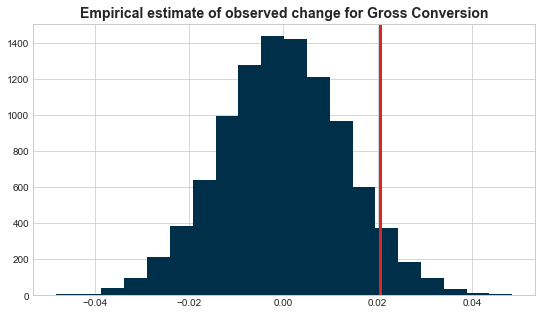

P-value 0.0606


In [64]:
##### empirical significance for gross conversion #####
num_permutations = 10000

perm_prop_diffs = np.zeros(num_permutations)

for i in range(num_permutations):
    p1, p2 = generate_permutation_samples(boot_df, seed=i, num = 'enrollments', denom = 'clicks')
    perm_prop_diffs[i] = p1 - p2


fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(perm_prop_diffs,
           bins=20,
           color = '#003049')
ax.axvline(prop_diff_gc.values,
           color='#d62828',
            linewidth=3.0)
plt.title("Empirical estimate of observed change for Gross Conversion", size=14, weight='bold')
plt.show()

p_value = np.sum(perm_prop_diffs >= prop_diff_gc.values) / len(perm_prop_diffs)
print('P-value', p_value)

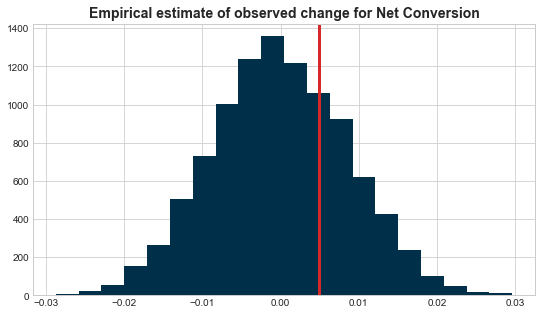

P-value 0.2875


In [65]:
##### empirical significance for net conversion #####
num_permutations = 10000

perm_prop_diffs = np.zeros(num_permutations)

for i in range(num_permutations):
    p1, p2 = generate_permutation_samples(boot_df, seed=i, num = 'payments', denom = 'clicks')
    perm_prop_diffs[i] = p1 - p2

fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(perm_prop_diffs,
           bins=20,
           color = '#003049')
ax.axvline(prop_diff_nc.values,
           color='#d62828',
            linewidth=3.0)
plt.title("Empirical estimate of observed change for Net Conversion", size=14, weight='bold')
plt.show()

p_value = np.sum(perm_prop_diffs >= prop_diff_nc.values) / len(perm_prop_diffs)
print('P-value', p_value)

### Conclusions from Bootstrapping:

- The Gross Conversion didn't show significant result(borderline significant at p value 0.06) as we saw with the analytical appoach above.
- The Net Conversion has shown an insignificant result same as the analytical result earlier.

These slight difference in the result in GC might be happenning because we only had 23 data points per group.

Going by the analytical approach, `No Launch`!!!!